## Diabetes prediction PIMA

Given the dataset containing the various diagnostic measurements like BMI, Blood pressure, Glucose level, etc. diagnostically predict whether or not a patient has diabetes.

The dataset consists of several predictor variables and single target variable, Outcome which is 0/1 for diabetic/non-diabetic.

Loading the dataset and trying to understand it

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


I can see few columns with 0 as the value. 0 Pregnancies is understandable but other fileds like BloodPressure and SkinThickness should not have 0 in it. Here the 0 must mean that the data is unavialable.
Let's check for NaN values too, just to be sure

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#no. of 0's per column
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
(df==0).sum().sum()

1263

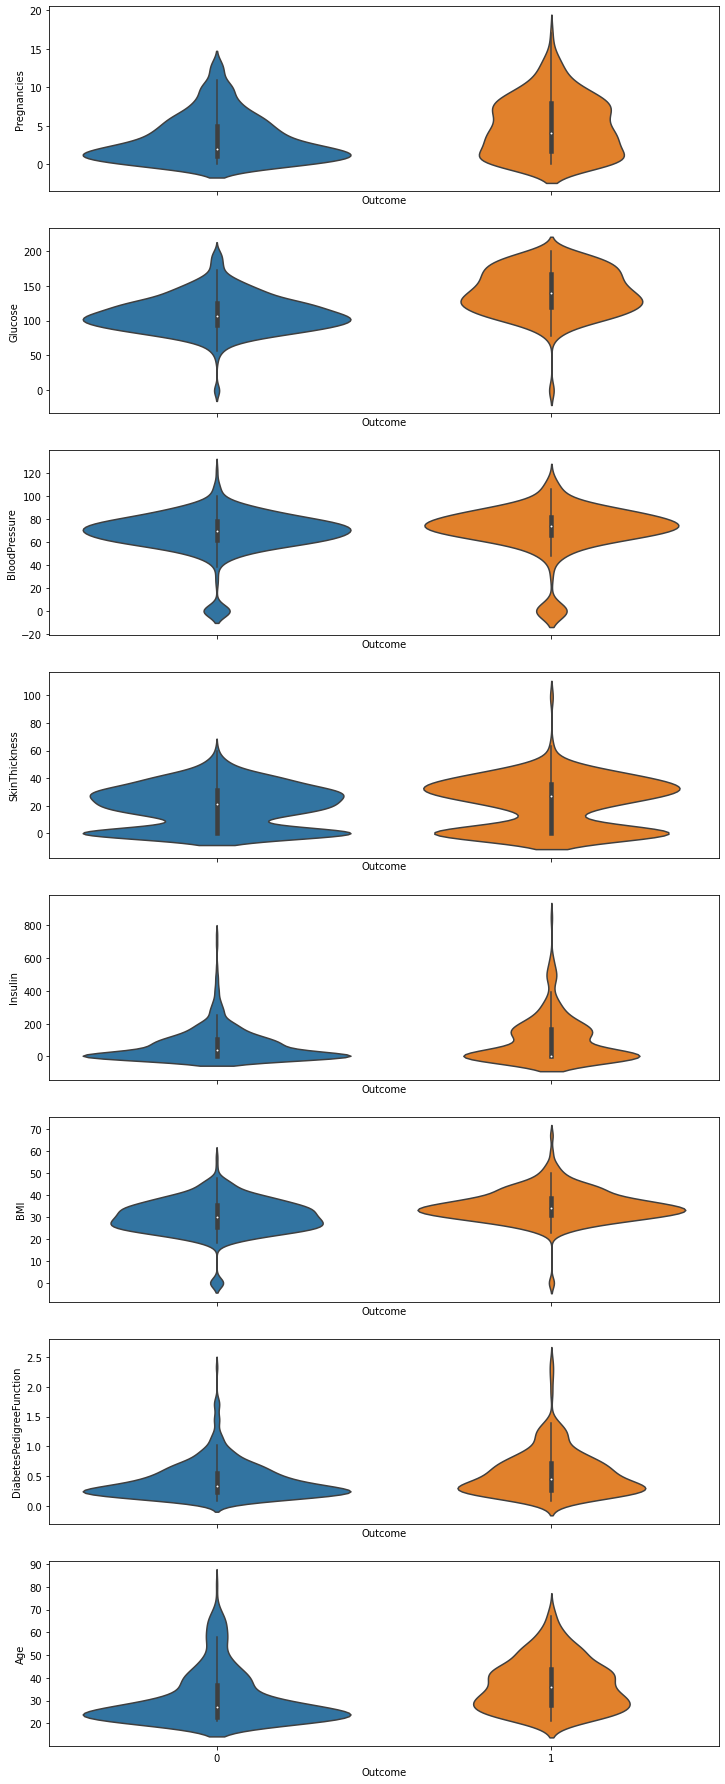

In [10]:
n=len(df.columns)-1 #plot 8 columns except Outcome
fig,ax = plt.subplots(n,1, figsize=(12,n*4), sharex=True) 
for i in range(n):
    plt.sca(ax[i])
    col = df.columns[i]
    sns.violinplot(x="Outcome",y=col, data=df)

The violin plot will help us take next step. There are columns which can normaly have 0 as value (like pregnancy) but some which should not (like Blood Pressure)
We will convert the 0 to NaN for these selected columns

In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now that we have the NaN values I will try to impute those NaN values.
The dataset is too complex and small to fill Nan with the mean. I will try to use KNN to impute the data.
The library we will be using is the impyute library.

In [13]:
import sys
from impyute.imputation.cs import fast_knn
#increasing the recursion limit of os
sys.setrecursionlimit(100000)

imputed_training=fast_knn(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)
df_t1 = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_t1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

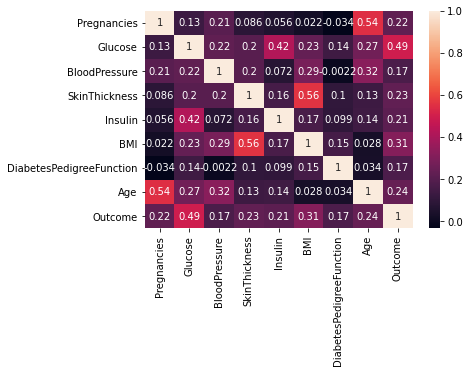

In [14]:
#The correlation plot
sns.heatmap(df.corr(), annot=True)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,155.522788,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,28.730839,155.899842,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


#### I have to standerize the data
Standardize features by removing the mean and scaling to unit variance for all x, y = (x-u)/s (where u is the mean and s is the standard deviation).<hr>
Some ML algorithmsassume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome', axis = 1))
scaler_features = scaler.transform(df.drop('Outcome', axis = 1))
df_feat = pd.DataFrame(scaler_features, columns = df.columns[:-1])

# appending the outcome feature
df_feat['Outcome'] = df['Outcome'].astype(int)

df = df_feat.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865905,-0.035362,0.664068,-0.000278,0.168829,0.468492,1.425995,1
1,-0.844885,-1.204923,-0.531459,-0.017854,0.000021,-0.849667,-0.365061,-0.190672,0
2,1.233880,2.016365,-0.696824,-0.048445,0.004160,-1.329816,0.604397,-0.105584,1
3,-0.844885,-1.073442,-0.531459,-0.699775,-0.724364,-0.631418,-0.920763,-1.041549,0
4,-1.141852,0.504332,-2.681211,0.664068,0.146571,1.551075,5.484909,-0.020496,1


I will prepare the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

I will certainly use KNN so I must find out the optimul value of k

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error"))
    return(rmse)

In [19]:
model_knn = KNeighborsClassifier()

i = [i for i in range(1, 100)]
cv_knn = [rmse_cv(KNeighborsClassifier(n_neighbors=j)).mean() 
            for j in i]

Text(0, 0.5, 'rmse')

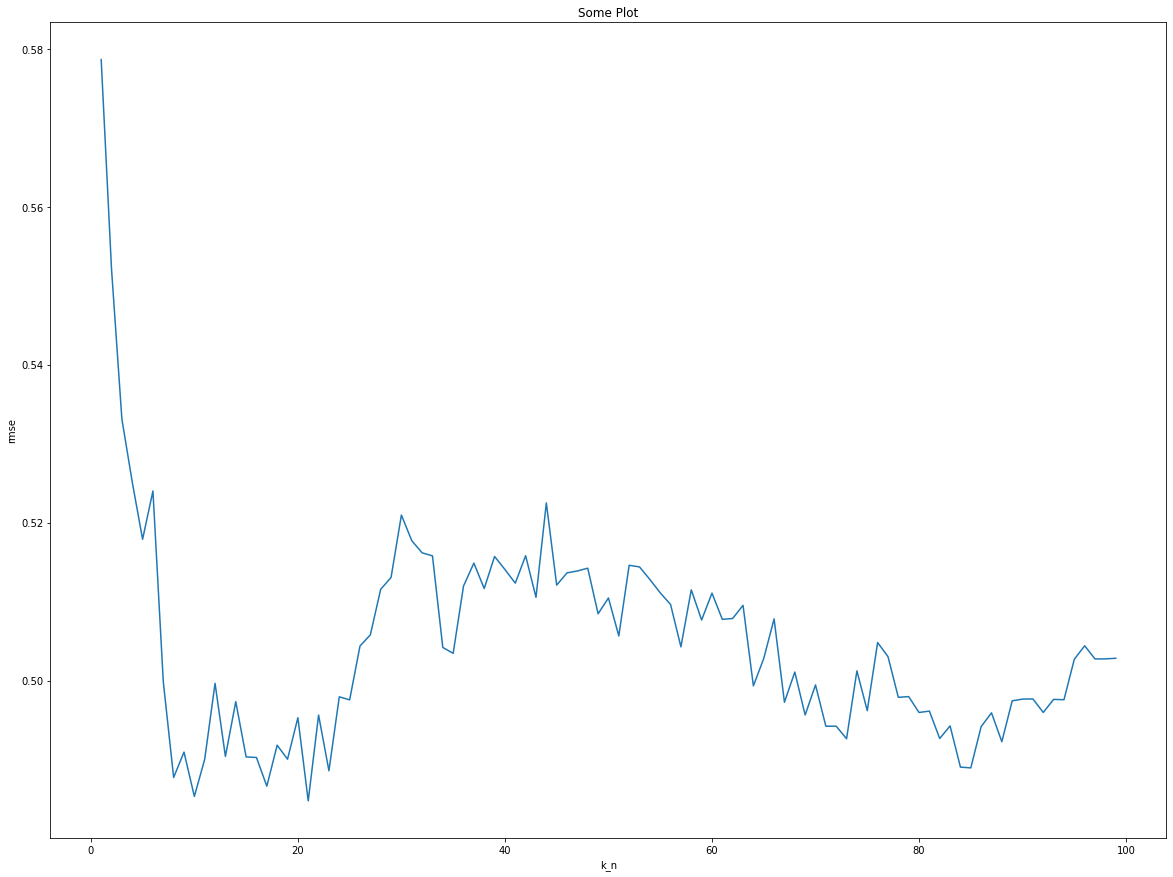

In [20]:
cv_knn = pd.Series(cv_knn, index = i)
cv_knn.plot(title = "Some Plot", figsize=(20, 15))
plt.xlabel("k_n")
plt.ylabel("rmse")

From the above graph we see that the rmse went down somewhere  after 20, Let's find out.

In [21]:
cv_knn.idxmin()

21

We get 21 in the first run, we will go back to impyute and use 21 as the value to 'k' in fast_knn.

21 is the optimal value of n_neighbors for the KNN.<br> Now We will train our actual model on the dataset created.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.62      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7140332272887947

In [24]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[i for i in range(3, 91)]}
grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

grid_knn.fit(X_train,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(X_train,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(X_test,y_test))

Best Score ==>  0.7778886872353297
Tuned Paramerers ==>  {'n_neighbors': 21}
Accuracy on Train set ==>  0.7934027777777778
Accuracy on Test set ==>  0.75


In [25]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.67      0.59      0.63        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



0.7158006362672322

<b> This model is far from perfect but it works, let's save it</b>
Not yet saving the model to test a recursive approach.

In [26]:
'''import os
import pickle
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/knn_21.sav"
pickle.dump(knn, open(MODEL_PATH, 'wb'))
'''

'import os\nimport pickle\n#Saving the model\nif not os.path.exists(\'models\'):\n    os.makedirs(\'models\')\n    \nMODEL_PATH = "models/knn_21.sav"\npickle.dump(knn, open(MODEL_PATH, \'wb\'))\n'